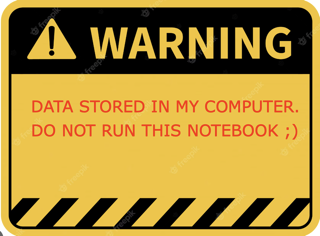

# 1. Import data

In [ ]:
import pandas as pd
import numpy as np

## 1.1. Load Transactions data

In [ ]:
train = pd.read_csv('trans_DF.csv')

In [ ]:
# df['date'] = pd.to_datetime(df['date'])
# df = df[df['date'].dt.year == 2020]
# df = df.drop(columns=['sales_channel_id','price'])

In [ ]:
train.date = train.loc[:, 'date'] = pd.to_datetime(train['date'])
train = train[['date','customer_id','article_id']]
train.to_parquet('train.pqt',index=False)

/var/folders/fr/stsx1pq12bdb5l6ym266534h0000gn/T/ipykernel_7630/2707841634.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.date = train.loc[:, 'date'] = pd.to_datetime(train['date'])


In [ ]:
print(train.shape)

(19586041, 3)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22379862 entries, 0 to 22379861
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   customer_id  object        
 2   article_id   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 683.0+ MB


In [ ]:
# tmp = train.groupby(['customer_id','article_id'])['date'].agg('count').reset_index()

In [ ]:
# tmp.columns = ['customer_id','article_id','ct']

In [ ]:
# train = train.merge(tmp,on=['customer_id','article_id'],how='left')

In [ ]:
# train = train.sort_values(['ct','date'],ascending=False)

In [ ]:
# train = train.drop_duplicates(['customer_id','article_id'])

In [ ]:
# train = train.sort_values(['ct','date'],ascending=False)

In [ ]:
# train.head()

date                                        customer_id  \
4323501  2019-02-16  94665b46e194622ccdbcadc0170f13a2f8ede1ff6d057d...   
11866139 2019-09-28  5cba04ed9a3759bc02a8a9e01efccc07ce76c35c1a70dc...   
6124508  2019-04-15  ebc0f83524828ee05e9dc70b50d21a261000d2015f6b20...   
9235554  2019-07-04  ce79a54991bb7c2c2d9427ae1e7f1d8c8b037f8d74b2fe...   
20260656 2020-07-02  d5902b0523749b377ab32f6de5e9a739cf690bb8dd0aa5...   

          article_id   ct  
4323501    629420001  199  
11866139   688558002  166  
6124508    685347001  130  
9235554    570004009  122  
20260656   179123001  120

## 1.2. Load pair dictionary (Outcome of 3.1. notebook)

In [ ]:
pairs = np.load('pairs.npy',allow_pickle=True).item()

In [ ]:
pairs

{706016001: 706016002,
 610776002: 610776001,
 751471001: 783346001,
 720125001: 720125007,
 706016002: 706016001,
 741356002: 824337001,
 841383002: 841383003,
 448509014: 448509001,
 599580038: 776237011,
 599580055: 559630026,
 599580052: 599580038,
 610776001: 610776002,
 759871002: 759871001,
 706016003: 706016001,
 714790020: 714790008,
 783346001: 783346018,
 866383001: 739590027,
 749699002: 749699001,
 850917001: 850917003,
 590928001: 712924012,
 841383003: 841383002,
 824337001: 741356002,
 748355003: 706016001,
 753737001: 753737015,
 783346018: 783346001,
 759465001: 706016001,
 688537004: 684209004,
 749699001: 749699002,
 760084003: 760084006,
 351484002: 723529001,
 806388002: 806388001,
 464297007: 706016001,
 684209027: 688537021,
 776237011: 599580038,
 758034001: 803468002,
 811925009: 811927007,
 573085043: 706016001,
 796210001: 796210012,
 372860002: 372860001,
 762846008: 762846006,
 372860001: 372860002,
 754404004: 754404006,
 776237020: 599580055,
 803468002:

# 2. Mapping the pairs to customers

## 3.1. Merge pairs (what-customers-normally-bought-together) to purchase (what-individual-customer has been bought)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18538262 entries, 4323501 to 35740
Data columns (total 4 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   customer_id  object        
 2   article_id   int64         
 3   ct           int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 707.2+ MB


In [ ]:
train['article_id_pair'] = train.article_id.map(pairs)

In [ ]:
train['article_id_pair'].notnull().sum()

15053749

In [ ]:
#make a copy
train_recommend = train[['customer_id','article_id_pair']].copy()
#drop null in the pair colummns
train_recommend = train_recommend.loc[train_recommend.article_id_pair.notnull()]
#convert to tuples
#train_recommend.loc[:, 'article_id_pair'] = train_recommend.article_id_pair.apply(tuple)
#drop dupliucates
train_recommend = train_recommend.drop_duplicates(['customer_id', 'article_id_pair'])
#change names
train_recommend = train_recommend.rename({'article_id_pair':'recommend_article_id'},axis=1)

In [ ]:
train_recommend.head()

customer_id  \
4323501   94665b46e194622ccdbcadc0170f13a2f8ede1ff6d057d...   
11866139  5cba04ed9a3759bc02a8a9e01efccc07ce76c35c1a70dc...   
6124508   ebc0f83524828ee05e9dc70b50d21a261000d2015f6b20...   
9235554   ce79a54991bb7c2c2d9427ae1e7f1d8c8b037f8d74b2fe...   
20260656  d5902b0523749b377ab32f6de5e9a739cf690bb8dd0aa5...   

          recommend_article_id  
4323501            732842021.0  
11866139           688558001.0  
6124508            536139006.0  
9235554            570004105.0  
20260656           768912001.0

## 3.2. Drop duplications so we dont recommend products that one customer already bought

In [ ]:
train = train[['customer_id','article_id']]
train = pd.concat([train,train_recommend],axis=0,ignore_index=True)
train.article_id = pd.to_numeric(train.article_id, errors='coerce').fillna(-1).astype('int32')
train = train.drop_duplicates(['customer_id','article_id'])

In [ ]:
train.head()

customer_id  article_id  \
0  94665b46e194622ccdbcadc0170f13a2f8ede1ff6d057d...   629420001   
1  5cba04ed9a3759bc02a8a9e01efccc07ce76c35c1a70dc...   688558002   
2  ebc0f83524828ee05e9dc70b50d21a261000d2015f6b20...   685347001   
3  ce79a54991bb7c2c2d9427ae1e7f1d8c8b037f8d74b2fe...   570004009   
4  d5902b0523749b377ab32f6de5e9a739cf690bb8dd0aa5...   179123001   

   recommend_article_id  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN

## 3.3. Covert Recommendations-to-every-customer DF to dictionary

In [ ]:
preds = pd.DataFrame( train.groupby('customer_id').article_id.sum().reset_index() )

In [ ]:
# Group article_id values by customer_id
grouped = train.groupby("customer_id")["article_id"].apply(list)
recommendation_dictionary = grouped.to_dict()

In [ ]:
recommendation_dictionary

## 3.4 Make it only five recommendations per customer

In [ ]:
five_recommendations_dict = {k: v[:5] for k, v in recommendation_dictionary.items()}
five_recommendations_dict

{'00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657': [797065001,
  568601006,
  841260003,
  887593002,
  890498002],
 '0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa': [811835004,
  723529001,
  351484002,
  689898002,
  599580055],
 '000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318': [750424014,
  870304002,
  351484002,
  663713001,
  794321007],
 '00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e': [742079001,
  732413001,
  -1],
 '00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a': [399061015,
  896152002,
  730683050,
  927530004,
  791587015],
 '000064249685c11552da43ef22a5030f35a147f723d5b02ddd9fd22452b1f5a6': [738133005,
  680265002,
  740962001,
  -1],
 '0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a': [719530003,
  448509014,
  715624008,
  783388001,
  735843004],
 '00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2': [779136002,
  312878010,
  614622018,
  745745

# 3. Visualization - Link recommended articles to the images

## Break into chuncks by functions and test a small set of dictionary

In [ ]:
test_dict = {'00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657': [841260003,
  887593002,
  890498002,
  795440001,
  859416011],
 '0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa': [866383001,
  863103001,
  590928022,
  739590027,
  377277001],
 '000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318': [723529001,
  351484002,
  727808001,
  727808007,
  858883002],
 '00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a': [589440005,
  827971001,
  818320001,
  896152002,
  730683050]}

## 4.1. Create "getFilename" function for generating the path to access image

input - productID ; output - file path

In [ ]:
def getFilename(productID):
    BASE = '/Users/yan/Desktop/final_project/Image_128'
    IDstring='0' + str(productID)
    directory= IDstring[ 0 : 3 ]
    filename=BASE + "/" + directory + "/" + IDstring + ".jpg" 
    return filename

product = 841260003
file = getFilename(product)
print(file)

/Users/yan/Desktop/final_project/Image_128/084/0841260003.jpg


In [ ]:
customerID='000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318'
productList = test_dict.get(customerID)
print (productList[0])

723529001


## 4.2 Create "print_products" function to print recommended products per customer

input - customerID

In [ ]:
def print_products(customerID):
    productList = test_dict.get(customerID)
    for product in productList:
        print(getFilename(product))
    return

In [ ]:
customer='000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318'
print_products(customer)

/Users/yan/Desktop/final_project/Image_128/072/0723529001.jpg
/Users/yan/Desktop/final_project/Image_128/035/0351484002.jpg
/Users/yan/Desktop/final_project/Image_128/072/0727808001.jpg
/Users/yan/Desktop/final_project/Image_128/072/0727808007.jpg
/Users/yan/Desktop/final_project/Image_128/085/0858883002.jpg


In [ ]:
for customer in test_dict.keys():
    print(customer)
    print_products(customer)

00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657
/Users/yan/Desktop/final_project/Image_128/084/0841260003.jpg
/Users/yan/Desktop/final_project/Image_128/088/0887593002.jpg
/Users/yan/Desktop/final_project/Image_128/089/0890498002.jpg
/Users/yan/Desktop/final_project/Image_128/079/0795440001.jpg
/Users/yan/Desktop/final_project/Image_128/085/0859416011.jpg
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa
/Users/yan/Desktop/final_project/Image_128/086/0866383001.jpg
/Users/yan/Desktop/final_project/Image_128/086/0863103001.jpg
/Users/yan/Desktop/final_project/Image_128/059/0590928022.jpg
/Users/yan/Desktop/final_project/Image_128/073/0739590027.jpg
/Users/yan/Desktop/final_project/Image_128/037/0377277001.jpg
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318
/Users/yan/Desktop/final_project/Image_128/072/0723529001.jpg
/Users/yan/Desktop/final_project/Image_128/035/0351484002.jpg
/Users/yan/Desktop/final_project/Image_128/072/0727808001.jpg

## 4.2. Create showProducts function to print images by the path

input - path

In [ ]:
from os.path import exists 
import matplotlib.pyplot as plt
import cv2, matplotlib.pyplot as plt

def showProducts(productList):
    numberProducts=len(productList)
    plt.figure(figsize=(numberProducts*5,5))
    #plt.title(title,size=16)
    for i in range(numberProducts):
        filename=getFilename(productList[i])
        if not exists(filename):
            print ("File '" + filename + "' does not exist")
            continue
        image = cv2.imread(filename)[:,:,::-1]
    
        plt.subplot(1,numberProducts,i+1)
        plt.title(productList[i],size=14)
        plt.imshow(image)
        plt.axis('off')  # turn off axis numbers
        
    plt.show()
    return


# 4. **OUTCOME: INSERT CUSTOMER ID, RETURN 5 RECOMMENDATIONS**

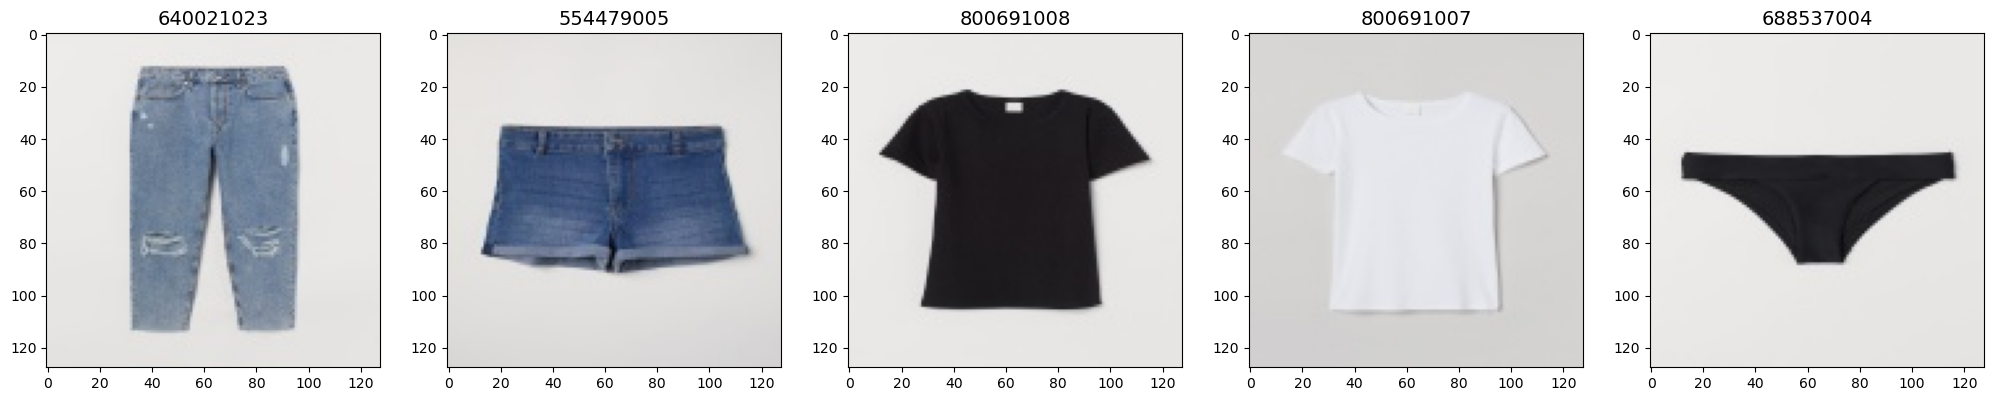

In [ ]:
customer='9f40ec3b4ae9e8594d71a3abdb3d7c4ab2b0582df14f8cf774fc3ac13b779a19'
customerProducts = five_recommendations_dict.get(customer)
showProducts(customerProducts)

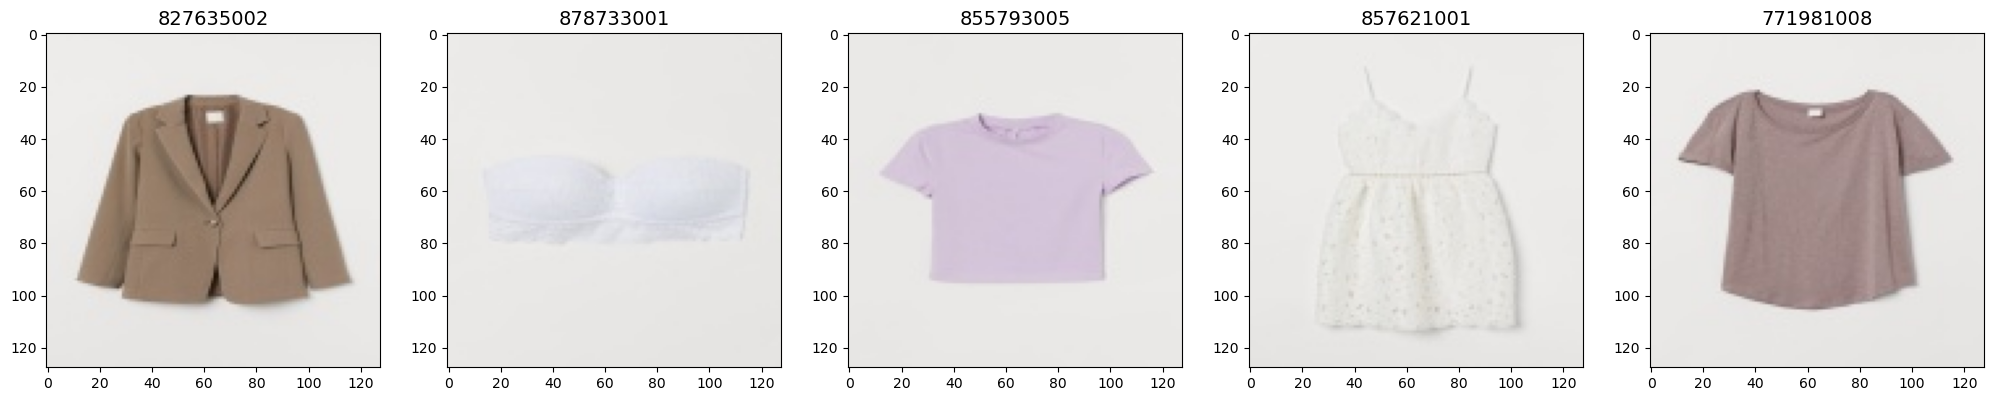

In [ ]:
customer='4308983955108b3af43ec57f0557211e44462a5633238351fff14c8b51f16093'
customerProducts = five_recommendations_dict.get(customer)
showProducts(customerProducts)

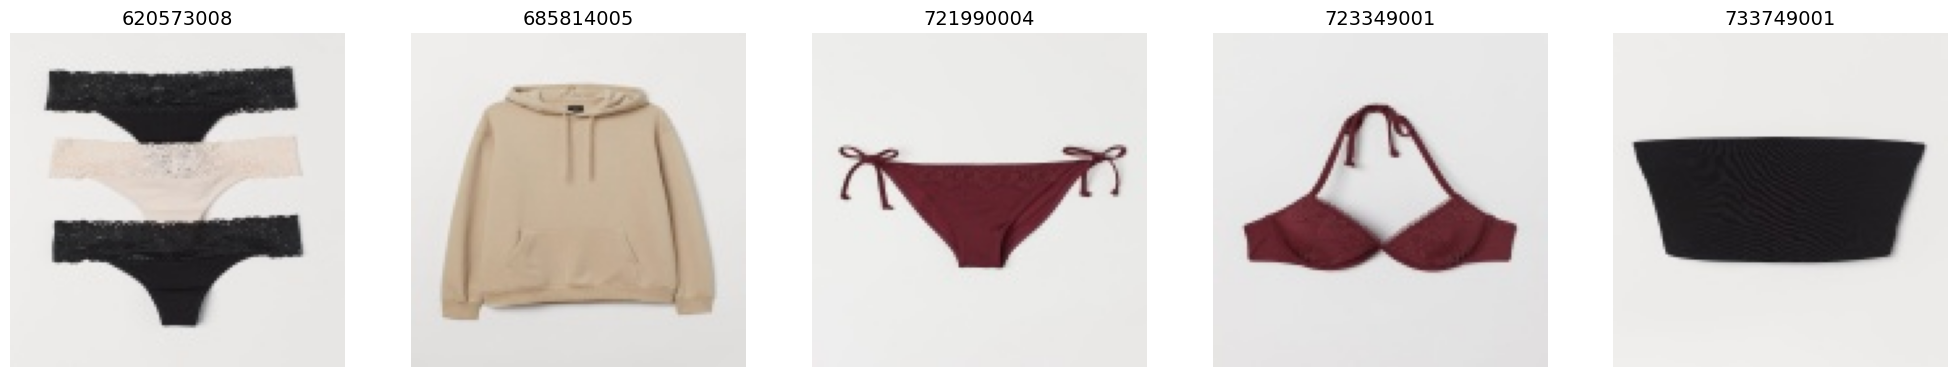

In [ ]:
customer='50572e53580cf7813850998ca484621b7c5dca57828f6d368039207b14acb427'
customerProducts = five_recommendations_dict.get(customer)
showProducts(customerProducts)

# 5. Sense Check Recommended Results

## Hunting for candidates for checking 

In [ ]:
df

customer_id  article_id       date  article_id_pair
14375935  0034b3dced3e565a43438bdfb5447e7321fea65388b398...   835247001 2020-01-01      787285005.0
14375936  00410b91d62eefa76958fa5cac12f5daa7cfc0556e417d...   802930002 2020-01-01      599580055.0
14375937  00410b91d62eefa76958fa5cac12f5daa7cfc0556e417d...   760084008 2020-01-01      760084003.0
14375938  004b0fb384bcab2f8e1059dd5ca68c17580365ab95c05a...   804662002 2020-01-01      825801001.0
14375939  004b0fb384bcab2f8e1059dd5ca68c17580365ab95c05a...   801554002 2020-01-01      801554001.0
...                                                     ...         ...        ...              ...
22379857  ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...   902288001 2020-09-22      759465001.0
22379858  ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...   856440002 2020-09-22      856440001.0
22379859  fff2282977442e327b45d8c89afde25617d00124d0f999...   929511001 2020-09-22      904625001.0
22379860  fff2282977442e327b45d8c89afde25617d00124d0f999...   891322004 2020-09-22      806388001.0
22379861  fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...   898573003 2020-09-22      915529003.0

[8003927 rows x 4 columns]

## - Customer who had the most purchased

In [ ]:
pd.set_option('display.max_colwidth', None)
article_count = df.groupby('customer_id')['article_id'].count().reset_index(name='count')
article_count = article_count.sort_values('count', ascending=False)
article_count[['customer_id', 'count']].head(10)

customer_id  count
493377  b637a3e7d8b0caa947aaefd609b8d84a9ee962cf0a52a51bac507ffc2bf1b741    720
450608  a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    613
489584  b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    587
514766  be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    586
280503  67931690bdf18d2e328854ae772cd5ce2505fdc11164693998b13e706db0bb56    585
672290  f874a19b8d3417b8a7eeffa3cecd595a5f6383e0876da285390dd9c2727e905d    565
343993  7f0ac4394297dc4a885d3b9277ba526cbbfbf7fb7cae465b256ed8e55b864f03    543
181270  4308983955108b3af43ec57f0557211e44462a5633238351fff14c8b51f16093    540
363377  863f0e03da282ae32a76775ce55d8a4605a85c84a26066e1ad0e9469e8c40e68    538
443218  a3ab708684132c6bbd3dad7aa41f9b9c7d1c95d7d5cb1a3a052905191e858566    525

## - Different age 

In [ ]:
customer_df = pd.read_csv('customers_DF.csv')

In [ ]:
merged_df = df.merge(customer_df, on='customer_id', how='left')

In [ ]:
age_18 = customer_df.loc[customer_df['age'] == 16]
age_18.sample(10)

customer_id  Active   age
323710  b2d65d9b8feb42f14fa689f4ba62140ddb8c6a01388c15bc36bba1bd5851a9a3     1.0  16.0
85654   2f6813ef5c1fce80163ceb5ea673a4395a5cb13b09e06ef160b0fdacab571424     1.0  16.0
284125  9d0f6128b6de161ceba302dd47a16a1f04edf1d8b69e30fbbeeaaf2108dc52f2     1.0  16.0
411686  e372a6345007d436ce26254782ec8444143af84103c71bc96ff6f5879dcaf8f9     1.0  16.0
197703  6d4296bf2834b83b2bb6e85b1c0ef915e83d403b4b1d9866ca9d51132c7eab44     1.0  16.0
74385   2929a568760c4d7fafd5f8119314cc6e7db21a28ff104a7b39b28b886ca571ff     1.0  16.0
390017  d7570d5830b3ee799602c26116cdd7c767531423d81e9779f626e80d488ee243     1.0  16.0
417784  e6de74b168da9fd503c4306398d44e1b8d9766cf6be568f758982bd024818973     1.0  16.0
423837  ea2ffefe06e653a15f9681d690bd460fcd843b82d8b7837db21d444c61cfd6e8     1.0  16.0
426983  ebe911ea6f523157a086bf0b431370bdb617a34f6c3279f327559ef4c5d17b1e     1.0  16.0

## Customer A - Pastel Lover

In [ ]:
customerA = '7f0ac4394297dc4a885d3b9277ba526cbbfbf7fb7cae465b256ed8e55b864f03'

In [ ]:
ageA = customer_df.loc[customer_df['customer_id'] == customerA]
ageA

customer_id  Active   age
229512  7f0ac4394297dc4a885d3b9277ba526cbbfbf7fb7cae465b256ed8e55b864f03     1.0  33.0

### What did she buy? 

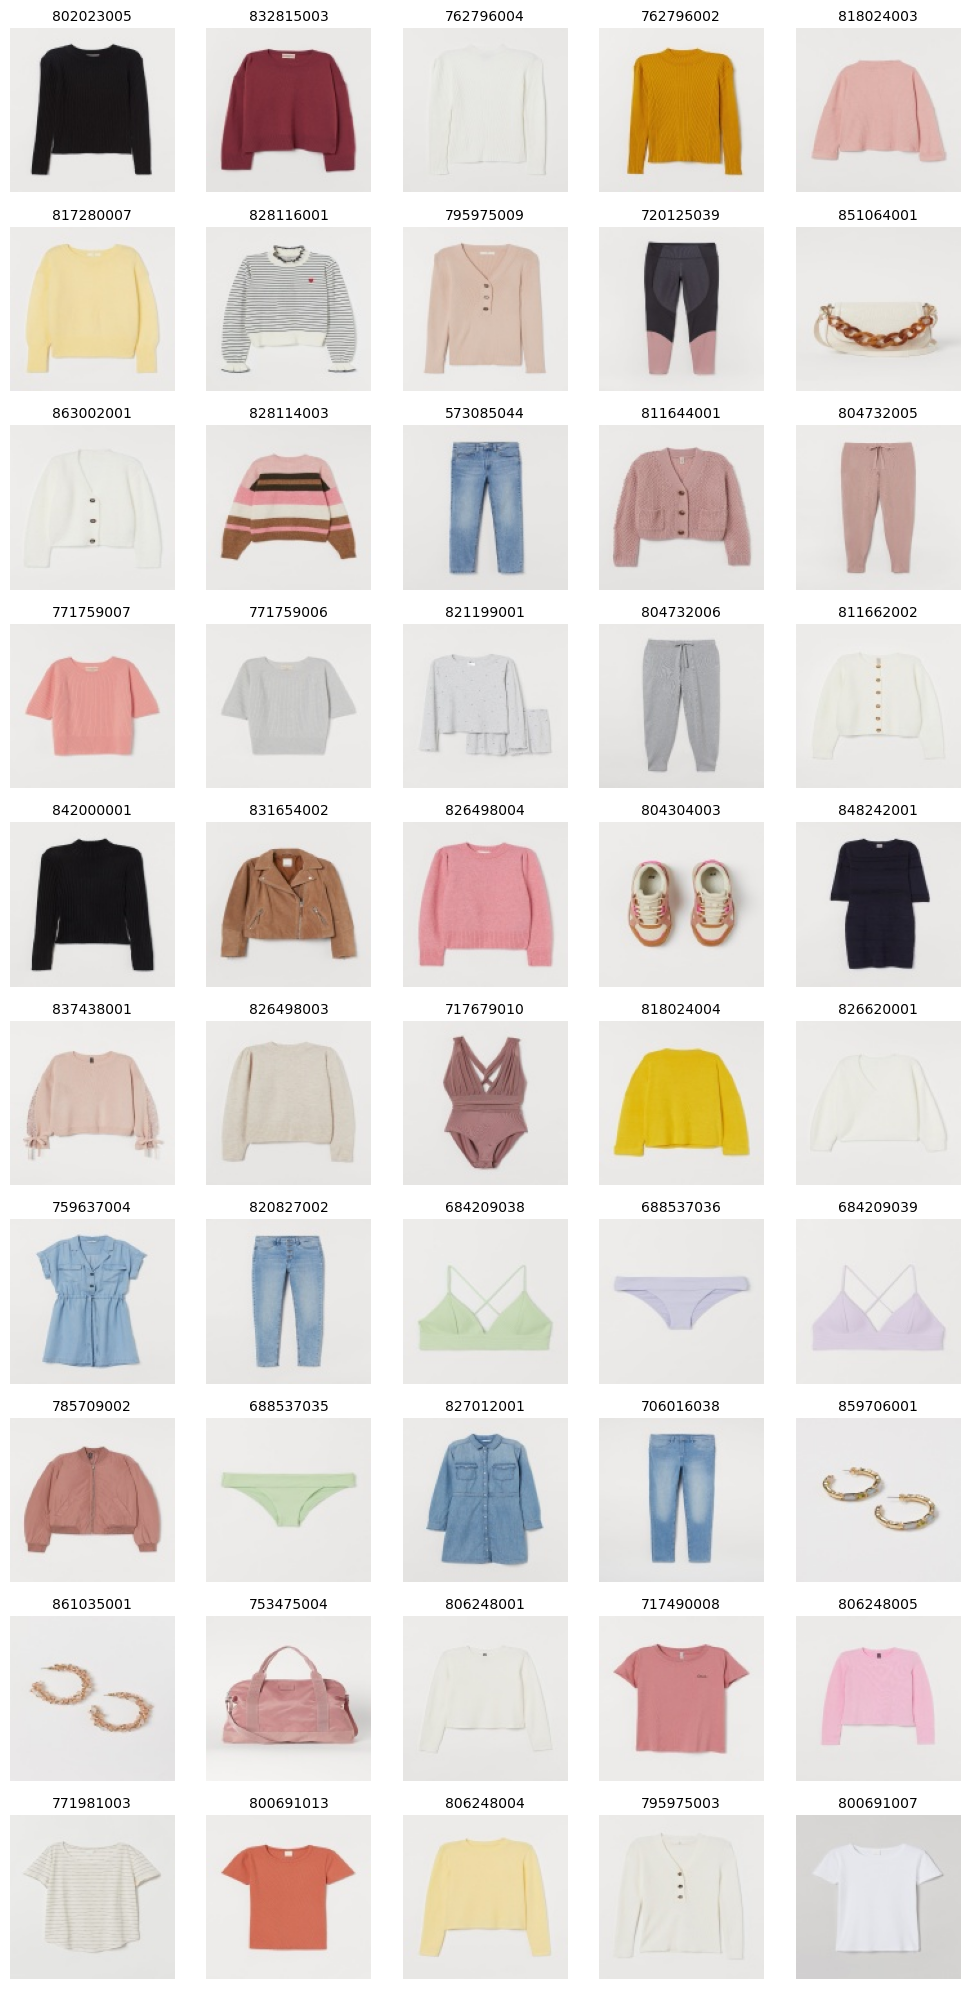

In [ ]:
customerA_rows = df.loc[df['customer_id'] == customerA]
customerA_rows = customerA_rows[['customer_id','article_id']]
customerA_rows = customerA_rows.drop_duplicates()  # drop duplicates
customerA_rows = customerA_rows.groupby("customer_id")["article_id"].apply(list)
customerA_dictionary = customerA_rows.to_dict()

ten_products_boughts = {k: v[:100] for k, v in customerA_dictionary.items()}

def showProductsBoughts(productList):
    numberProducts = len(productList)
    plt.figure(figsize=(10, 20))  # set figure size
    
    rows = 10  # number of subplot rows
    cols = 5  # number of subplot columns
    
    for i in range(rows * cols):
        if i >= numberProducts:
            break
        
        filename = getFilename(productList[i])
        if not exists(filename):
            print("File '" + filename + "' does not exist")
            continue
        image = cv2.imread(filename)[:,:,::-1]
        
        plt.subplot(rows, cols, i+1)
        plt.title(productList[i], size=10)
        plt.imshow(image)
        plt.axis('off')  # turn off axis numbers
    
    plt.tight_layout()  # adjust subplot spacing
    plt.show()
    return

customer= customerA
customerProducts = ten_products_boughts.get(customer)
showProductsBoughts(customerProducts)

### What do we recommend her? 

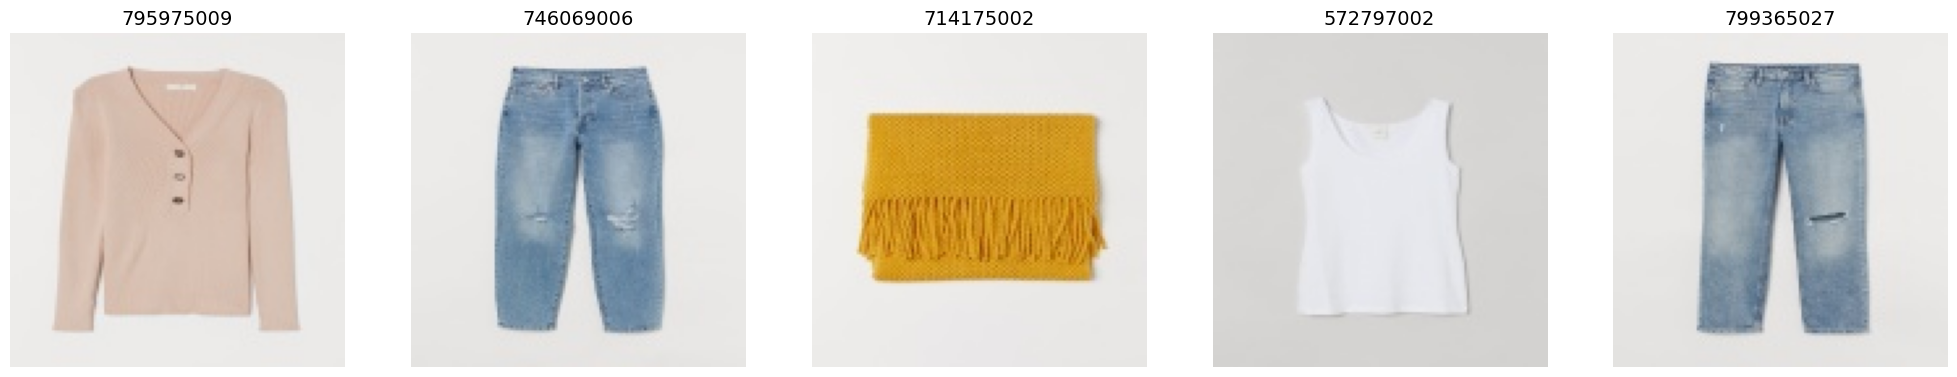

In [ ]:
customerProducts = five_recommendations_dict.get(customerA)
showProducts(customerProducts)

## Customer B -  Fashionable Granny

In [ ]:
customerB = 'a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc'

In [ ]:
ageB = customer_df.loc[customer_df['customer_id'] == customerB]
ageB

customer_id  Active   age
301049  a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc     1.0  61.0

### What did she buy before? 

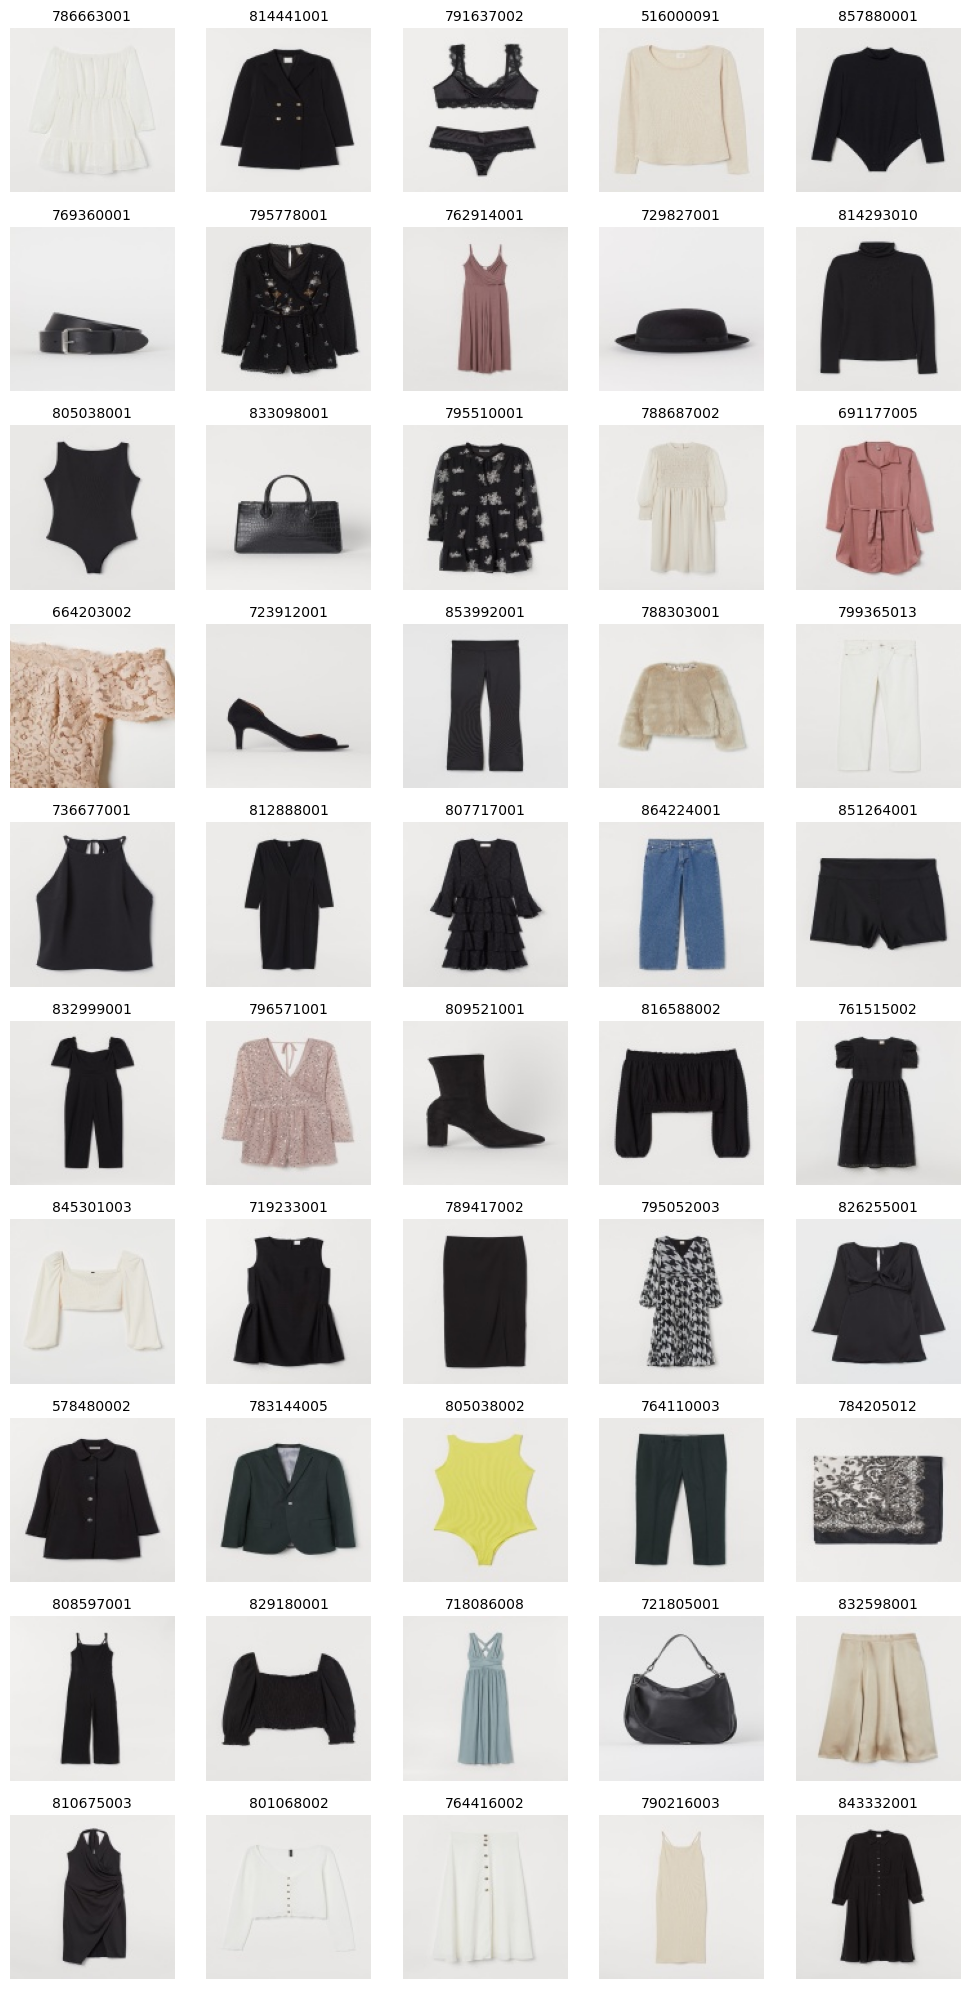

In [ ]:
customerB_rows = df.loc[df['customer_id'] == customerB]
customerB_rows = customerB_rows[['customer_id','article_id']]
customerB_rows = customerB_rows.drop_duplicates()  # drop duplicates
customerB_rows = customerB_rows.groupby("customer_id")["article_id"].apply(list)
customerB_dictionary = customerB_rows.to_dict()

ten_products_boughts = {k: v[:70] for k, v in customerB_dictionary.items()}

def showProductsBoughts(productList):
    numberProducts = len(productList)
    plt.figure(figsize=(10, 20))  # set figure size
    
    rows = 10  # number of subplot rows
    cols = 5  # number of subplot columns
    
    for i in range(rows * cols):
        if i >= numberProducts:
            break
        
        filename = getFilename(productList[i])
        if not exists(filename):
            print("File '" + filename + "' does not exist")
            continue
        image = cv2.imread(filename)[:,:,::-1]
        
        plt.subplot(rows, cols, i+1)
        plt.title(productList[i], size=10)
        plt.imshow(image)
        plt.axis('off')  # turn off axis numbers
    
    plt.tight_layout()  # adjust subplot spacing
    plt.show()
    return

customer= customerB
customerProducts = ten_products_boughts.get(customer)
showProductsBoughts(customerProducts)

### What do we recommend her? 

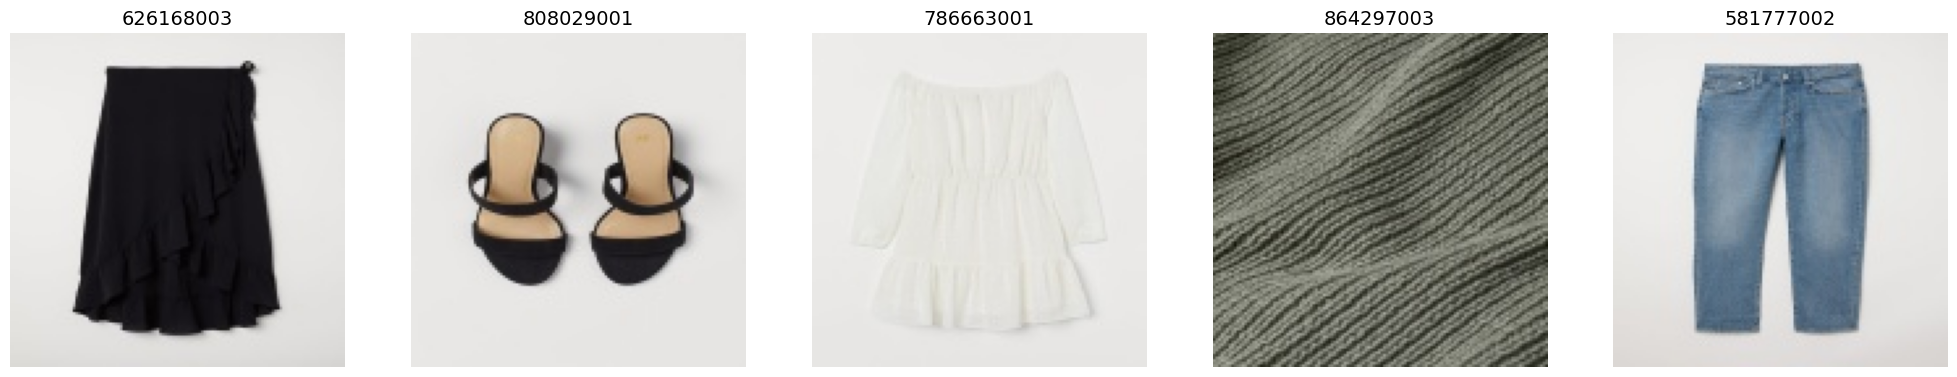

In [ ]:
customerProducts = five_recommendations_dict.get(customerB)
showProducts(customerProducts)

## Customer C - A typical Cold Start Problem

In [ ]:
customerC = 'ebe911ea6f523157a086bf0b431370bdb617a34f6c3279f327559ef4c5d17b1e'

In [ ]:
ageC = customer_df.loc[customer_df['customer_id'] == customerC]
ageC

customer_id  Active   age
426983  ebe911ea6f523157a086bf0b431370bdb617a34f6c3279f327559ef4c5d17b1e     1.0  16.0

In [ ]:
customerC_rows = df.loc[df['customer_id'] == customerC]
customerC_rows = customerC_rows[['customer_id','article_id']]
customerC_rows = customerC_rows.drop_duplicates()  # drop duplicates
customerC_rows = customerC_rows.groupby("customer_id")["article_id"].apply(list)
customerC_dictionary = customerC_rows.to_dict()

ten_products_boughts = {k: v[:10] for k, v in customerC_dictionary.items()}

def showProductsBoughts(productList):
    numberProducts = len(productList)
    plt.figure(figsize=(10, 20))  # set figure size
    
    rows = 10  # number of subplot rows
    cols = 5  # number of subplot columns
    
    for i in range(rows * cols):
        if i >= numberProducts:
            break
        
        filename = getFilename(productList[i])
        if not exists(filename):
            print("File '" + filename + "' does not exist")
            continue
        image = cv2.imread(filename)[:,:,::-1]
        
        plt.subplot(rows, cols, i+1)
        plt.title(productList[i], size=10)
        plt.imshow(image)
    
    plt.tight_layout()  # adjust subplot spacing
    plt.show()
    return

customer= customerC
customerProducts = ten_products_boughts.get(customer)
showProductsBoughts(customerProducts)

/var/folders/fr/stsx1pq12bdb5l6ym266534h0000gn/T/ipykernel_7630/1384823453.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  customerC_rows = customerC_rows.groupby("customer_id")["article_id"].apply(list)


TypeError: object of type 'NoneType' has no len()

In [ ]:
customerProducts = five_recommendations_dict.get(customerC)
showProducts(customerProducts)

TypeError: object of type 'NoneType' has no len()